In [16]:
import pandas as pd


In [17]:
df= pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.dropna(inplace=True)

In [20]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [23]:
tree  =DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = tree.predict(X_test)

In [25]:
acc = accuracy_score(y_test,y_pred)
print(acc)
prec = precision_score(y_test,y_pred)
print(prec)
rec = recall_score(y_test,y_pred)
print(rec)
f1 = f1_score(y_test,y_pred)
print(f1)

0.7467532467532467
0.6290322580645161
0.7090909090909091
0.6666666666666666


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

[[76 23]
 [16 39]]


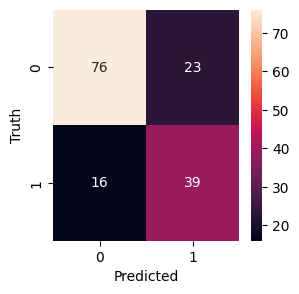

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


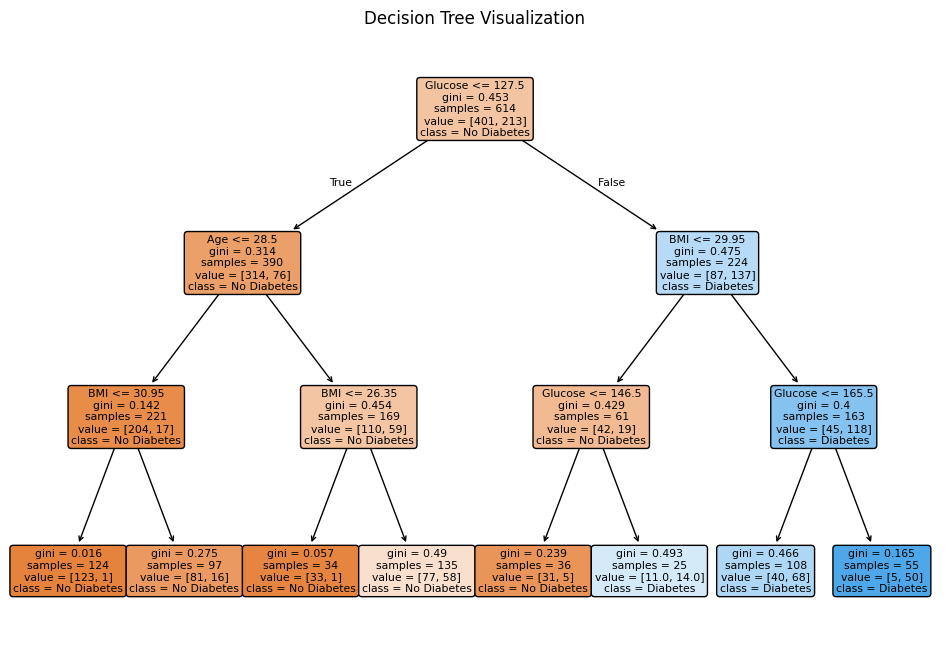

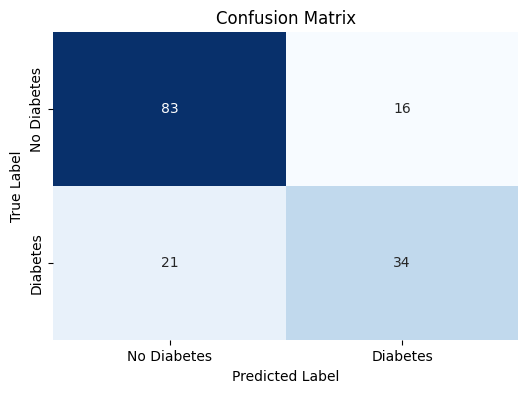

In [34]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

param_grid = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

y_pred = best_tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
